In [3]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-3.5-turbo"],
    },
)

In [4]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0,  # temperature for sampling
    },  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=8,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
)
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? What is the S&P 500 performance YTD compared to the NASDAQ? Show me a chart""",
)

user_proxy (to assistant):

What date is today? What is the S&P 500 performance YTD compared to the NASDAQ? Show me a chart

--------------------------------------------------------------------------------
assistant (to user_proxy):

To get the current date, you can use the `datetime` module in Python. Here's the code:

```python
import datetime

current_date = datetime.date.today()
print("Today's date is:", current_date)
```

To compare the performance of the S&P 500 and NASDAQ, you'll need to access financial data. One way to do this is by using the `yfinance` library in Python. Here's the code to compare the YTD performance:

```python
import yfinance as yf

# Get the data for S&P 500 and NASDAQ
sp500 = yf.Ticker("^GSPC")
nasdaq = yf.Ticker("^IXIC")

# Get the historical data for YTD
start_date = current_date.replace(month=1, day=1)
end_date = current_date
sp500_data = sp500.history(start=start_date, end=end_date)
nasdaq_data = nasdaq.history(start=start_date, end=end_date)

# Calcu

Today's date is: 2023-10-29


/tmp/ipykernel_13306/248279341.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_ytd = (sp500_data["Close"][-1] - sp500_data["Close"][0]) / sp500_data["Close"][0] * 100
/tmp/ipykernel_13306/248279341.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nasdaq_ytd = (nasdaq_data["Close"][-1] - nasdaq_data["Close"][0]) / nasdaq_data["Close"][0] * 100


S&P 500 YTD performance: 7.667873897042182 %
NASDAQ YTD performance: 21.719779907764643 %


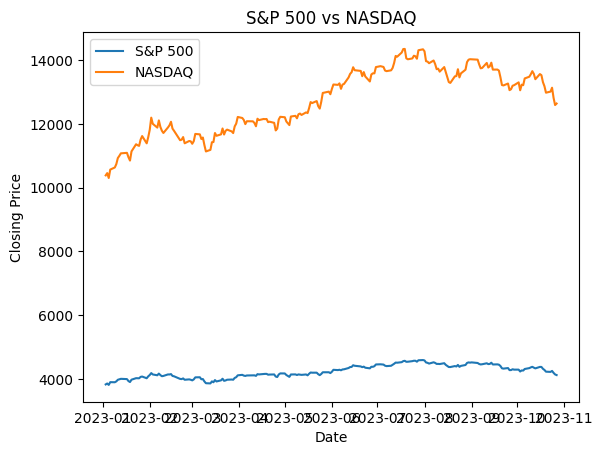

In [9]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# Get the current date
current_date = datetime.date.today()
print("Today's date is:", current_date)

# Get the data for S&P 500 and NASDAQ
sp500 = yf.Ticker("^GSPC")
nasdaq = yf.Ticker("^IXIC")

# Get the historical data for YTD
start_date = datetime.datetime(current_date.year, 1, 1)
end_date = current_date
sp500_data = sp500.history(start=start_date, end=end_date)
nasdaq_data = nasdaq.history(start=start_date, end=end_date)

# Calculate the YTD performance
sp500_ytd = (sp500_data["Close"][-1] - sp500_data["Close"][0]) / sp500_data["Close"][0] * 100
nasdaq_ytd = (nasdaq_data["Close"][-1] - nasdaq_data["Close"][0]) / nasdaq_data["Close"][0] * 100

# Print the YTD performance
print("S&P 500 YTD performance:", sp500_ytd, "%")
print("NASDAQ YTD performance:", nasdaq_ytd, "%")

# Plot the historical data
plt.plot(sp500_data.index, sp500_data["Close"], label="S&P 500")
plt.plot(nasdaq_data.index, nasdaq_data["Close"], label="NASDAQ")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("S&P 500 vs NASDAQ")
plt.legend()
plt.show()